In [2]:
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

In [3]:
data = pd.read_excel ("Dati_Scania.xlsx")
data.shape

(26085, 66)

In [3]:
data = data.drop_duplicates().reset_index().drop(columns=['index'])
data

,AnticipationScaniaDriverSupport,AverageFuelConsumption,AverageFuelDriveAndIdleCompareSign,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkCompareSign,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLCompareSign,...,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TotalGasIdle,TotalGasPto,TotalGasUsed,TransportWork,UseOfBrakesScaniaDriverSupport,Vin
0,33.0,43.7,≤,43.7,11.9,≥,65.0,27.0,448,≤,...,0,60,1,17,0.0,0.0,0.0,2695.0,43.0,YS2P6X20009242741
1,48.0,47.6,≤,47.6,21.3,≥,52.0,24.0,551,≤,...,0,48,1,3,0.0,0.0,0.0,2240.0,NaN,YS2P6X20009243357
2,51.0,28.9,≤,28.9,23.3,≥,67.0,18.0,328,≤,...,0,40,1,8,0.0,0.0,0.0,2021.0,NaN,YS2P6X20009243797
3,NaN,32.7,≤,32.7,14.9,≥,51.0,15.0,831,≤,...,0,54,3,11,NaN,NaN,NaN,1997.0,NaN,YS2P4X20009247867
4,0.0,33.0,≤,33.0,12.1,≥,47.0,15.0,676,≤,...,0,35,1,10,NaN,NaN,NaN,1160.0,NaN,YS2P4X20009247986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,NaN,30.4,≤,30.4,11.7,≥,51.0,14.0,776,≤,...,0,56,3,18,NaN,NaN,NaN,1788.0,NaN,YS2P4X20009248881
2031,48.0,44.5,≤,44.5,9.5,≥,40.0,16.0,213,≤,...,0,19,1,5,0.0,0.0,0.0,508.0,NaN,YS2P6X20009243797
2032,58.0,39.3,≤,39.3,17.3,≥,55.0,21.0,790,≤,...,0,49,2,5,0.0,0.0,0.0,2268.0,NaN,YS2P6X20009243357
2033,NaN,29.8,≤,29.8,21.2,≥,48.0,14.0,1143,≤,...,0,69,3,8,NaN,NaN,NaN,2811.0,NaN,YS2P4X20009248875


In [4]:
col_to_delete = []

for c in data.columns:
    if (data[c].isna().sum() > 400):
        col_to_delete.append(c)
        print(c, data[c].isna().sum() )
        print()


AnticipationScaniaDriverSupport 964

ChoiceOfGearScaniaDriverSupport 1955

CoastingInNeutral 832

DistanceWithTrailer 1330

DrivingOutsideOptimumEngineSpeedValue 1521

DrivingWithVehicleWarningCompareSign 497

DrivingWithVehicleWarningValue 530

HillDrivingScaniaDriverSupport 1316

MaxEngineSpeed 1656

MaxVehicleSpeed 1656

ScaniaDriverSupportValue 963

SpeedingValue 840

TotalGasIdle 1519

TotalGasPto 1519

TotalGasUsed 1519

UseOfBrakesScaniaDriverSupport 1698



In [5]:
data = data.drop(col_to_delete, axis=1)
print(data.shape)

(2035, 50)


In [6]:
col_to_delete = []

for c in data.columns:
    if (len(set(data[c])) == 1):
        col_to_delete.append(c)

col_to_delete

['AverageFuelDriveAndIdleCompareSign',
 'AverageTransportWorkCompareSign',
 'BrakeApplicationsTLCompareSign',
 'CoastingCompareSign',
 'DrivingOutsideOptimumEngineSpeedCompareSign',
 'EngineOverSpeedCompareSign',
 'EngineRuntimePause',
 'HarshAccelerationsCompareSign',
 'HarshBrakeApplicationsTLCompareSign',
 'IdlingCompareSign',
 'ScaniaDriverSupportCompareSign',
 'SpeedingCompareSign',
 'TotalDistanceWithPerformanceModeOffRoad']

In [7]:
data = data.drop(col_to_delete, axis=1)
data.shape

(2035, 37)

In [8]:
data['PerformanceModeOffRoadPercentage'].value_counts()

0.0    1990
Name: PerformanceModeOffRoadPercentage, dtype: int64

In [9]:
list(data.columns)

['AverageFuelConsumption',
 'AverageFuelDriveAndIdleValue',
 'AverageSpeed',
 'AverageTransportWorkValue',
 'AverageWeight',
 'BrakeApplications',
 'BrakeApplicationsTLValue',
 'ChassisNumber',
 'CoastingValue',
 'CustomerVehicleName',
 'Distance',
 'DistanceWithCruiseControl',
 'EngineOverSpeedValue',
 'EngineRunningTime',
 'EngineRuntimeIdle',
 'EngineRuntimePto',
 'FuelConsumptionPerHour',
 'HarshAccelerationsValue',
 'HarshBrakeApplications',
 'HarshBrakeApplicationsTLValue',
 'IdlingValue',
 'LicensePlate',
 'Odometer',
 'PerformanceModeEconomyPercentage',
 'PerformanceModeOffRoadPercentage',
 'PerformanceModePowerPercentage',
 'PerformanceModeStandardPercentage',
 'StartDate',
 'StopDate',
 'TotalDistanceWithPerformanceModeEconomy',
 'TotalDistanceWithPerformanceModePower',
 'TotalDistanceWithPerformanceModeStandard',
 'TotalFuelConsumption',
 'TotalFuelConsumptionIdling',
 'TotalFuelConsumptionPto',
 'TransportWork',
 'Vin']

In [10]:
data

,AverageFuelConsumption,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLValue,ChassisNumber,CoastingValue,CustomerVehicleName,...,StartDate,StopDate,TotalDistanceWithPerformanceModeEconomy,TotalDistanceWithPerformanceModePower,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TransportWork,Vin
0,43.7,43.7,11.9,65.0,27.0,448,455.6,9242741,5.6,FV059FV*,...,2021-07-23 04:30,2021-07-24 04:09,0,98,0,60,1,17,2695.0,YS2P6X20009242741
1,47.6,47.6,21.3,52.0,24.0,551,591.3,9243357,16.4,FV060FV*,...,2021-07-23 03:45,2021-07-23 23:05,0,93,0,48,1,3,2240.0,YS2P6X20009243357
2,28.9,28.9,23.3,67.0,18.0,328,299.8,9243797,2.8,FW934DT*,...,2021-07-23 03:46,2021-07-24 06:51,109,0,0,40,1,8,2021.0,YS2P6X20009243797
3,32.7,32.7,14.9,51.0,15.0,831,635.9,9247867,3.0,FV908SK*,...,2021-07-23 03:30,2021-07-24 05:03,0,131,0,54,3,11,1997.0,YS2P4X20009247867
4,33.0,33.0,12.1,47.0,15.0,676,873.3,9247986,1.3,FV907SK*,...,2021-07-23 05:18,2021-07-24 05:16,77,0,0,35,1,10,1160.0,YS2P4X20009247986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,30.4,30.4,11.7,51.0,14.0,776,620.4,9248881,4.2,FZ330SC*,...,2021-06-28 02:52,2021-06-28 16:46,125,0,0,56,3,18,1788.0,YS2P4X20009248881
2031,44.5,44.5,9.5,40.0,16.0,213,676.2,9243797,11.3,FW934DT*,...,2021-09-10 05:52,2021-09-10 16:32,0,32,0,19,1,5,508.0,YS2P6X20009243797
2032,39.3,39.3,17.3,55.0,21.0,790,716.1,9243357,14.1,FV060FV*,...,2021-09-02 04:50,2021-09-02 13:12,110,0,0,49,2,5,2268.0,YS2P6X20009243357
2033,29.8,29.8,21.2,48.0,14.0,1143,559.5,9248875,4.2,FV906SK*,...,2021-09-02 04:51,2021-09-02 17:58,204,0,0,69,3,8,2811.0,YS2P4X20009248875


In [11]:
data = data.sort_values(["LicensePlate", "StartDate"]).reset_index().drop(columns=['index'])
data

,AverageFuelConsumption,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLValue,ChassisNumber,CoastingValue,CustomerVehicleName,...,StartDate,StopDate,TotalDistanceWithPerformanceModeEconomy,TotalDistanceWithPerformanceModePower,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TransportWork,Vin
0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,FV059FV*,...,2021-05-25 03:50,2021-05-26 04:10,188,0,0,74,3,6,4329.0,YS2P6X20009242741
1,38.6,38.6,22.8,69.0,26.0,869,378.4,9242741,5.1,FV059FV*,...,2021-05-26 04:10,2021-05-27 03:13,230,0,0,99,3,10,5905.0,YS2P6X20009242741
2,38.6,38.6,22.8,69.0,26.0,869,378.4,9242741,5.1,FV059FV*,...,2021-05-26 04:10,2021-05-26 16:58,230,0,0,99,3,10,5905.0,YS2P6X20009242741
3,40.6,40.6,24.9,67.0,27.0,1067,345.8,9242741,4.2,FV059FV*,...,2021-05-27 03:13,2021-05-28 02:59,275,34,0,139,3,14,8203.0,YS2P6X20009242741
4,41.4,41.4,24.1,65.0,26.0,950,347.1,9242741,4.1,FV059FV*,...,2021-05-27 03:13,2021-05-27 14:41,240,34,0,127,2,14,7223.0,YS2P6X20009242741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,30.8,30.8,13.5,52.0,15.0,800,577.4,9248881,3.6,FZ330SC*,...,2021-09-17 05:53,2021-09-17 17:00,138,0,0,56,3,14,2069.0,YS2P4X20009248881
2031,31.9,31.9,11.1,50.0,15.0,747,572.0,9248881,4.7,FZ330SC*,...,2021-09-20 05:50,2021-09-21 05:21,131,0,0,59,4,18,1909.0,YS2P4X20009248881
2032,31.9,31.9,11.1,50.0,15.0,747,572.0,9248881,4.7,FZ330SC*,...,2021-09-20 05:50,2021-09-20 18:57,131,0,0,59,4,18,1909.0,YS2P4X20009248881
2033,30.6,30.6,11.4,50.0,14.0,672,603.3,9248881,3.6,FZ330SC*,...,2021-09-21 05:21,2021-09-22 05:49,111,0,0,49,2,15,1577.0,YS2P4X20009248881


In [12]:
data['LicensePlate'].value_counts()

FV914SK    210
FV904SK    197
FY297YC    189
FV059FV    185
FV060FV    182
FV906SK    179
FV913SK    162
FV903SK    158
FZ330SC    149
FV908SK    149
FW934DT    149
FV907SK    126
Name: LicensePlate, dtype: int64

In [13]:
data['StopDate'] = pd.to_datetime(data['StopDate'])
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['tot_time'] = data['StopDate'] - data['StartDate']
data['tot_time'] = data['tot_time'].apply(lambda x: int(x.total_seconds()/3600))

In [14]:
data['tot_time'].value_counts()

24    364
23    303
7     160
12    144
8     144
11    136
10    107
6      91
13     76
9      75
25     52
14     45
22     43
15     34
0      33
5      24
3      19
16     19
26     18
21     18
4      15
2      14
17     13
28     12
20     11
27     11
29     11
18     10
19      9
1       7
30      6
31      3
32      2
36      2
39      1
33      1
34      1
40      1
Name: tot_time, dtype: int64

In [15]:
data_truck_1 = data[data['LicensePlate'] == 'FV059FV'].copy()
data_truck_1[['StartDate', 'StopDate']]

,StartDate,StopDate
0,2021-05-25 03:50:00,2021-05-26 04:10:00
1,2021-05-26 04:10:00,2021-05-27 03:13:00
2,2021-05-26 04:10:00,2021-05-26 16:58:00
3,2021-05-27 03:13:00,2021-05-28 02:59:00
4,2021-05-27 03:13:00,2021-05-27 14:41:00
...,...,...
180,2021-09-18 03:48:00,2021-09-18 13:41:00
181,2021-09-20 04:00:00,2021-09-21 04:11:00
182,2021-09-20 04:00:00,2021-09-20 12:31:00
183,2021-09-21 04:11:00,2021-09-22 04:28:00


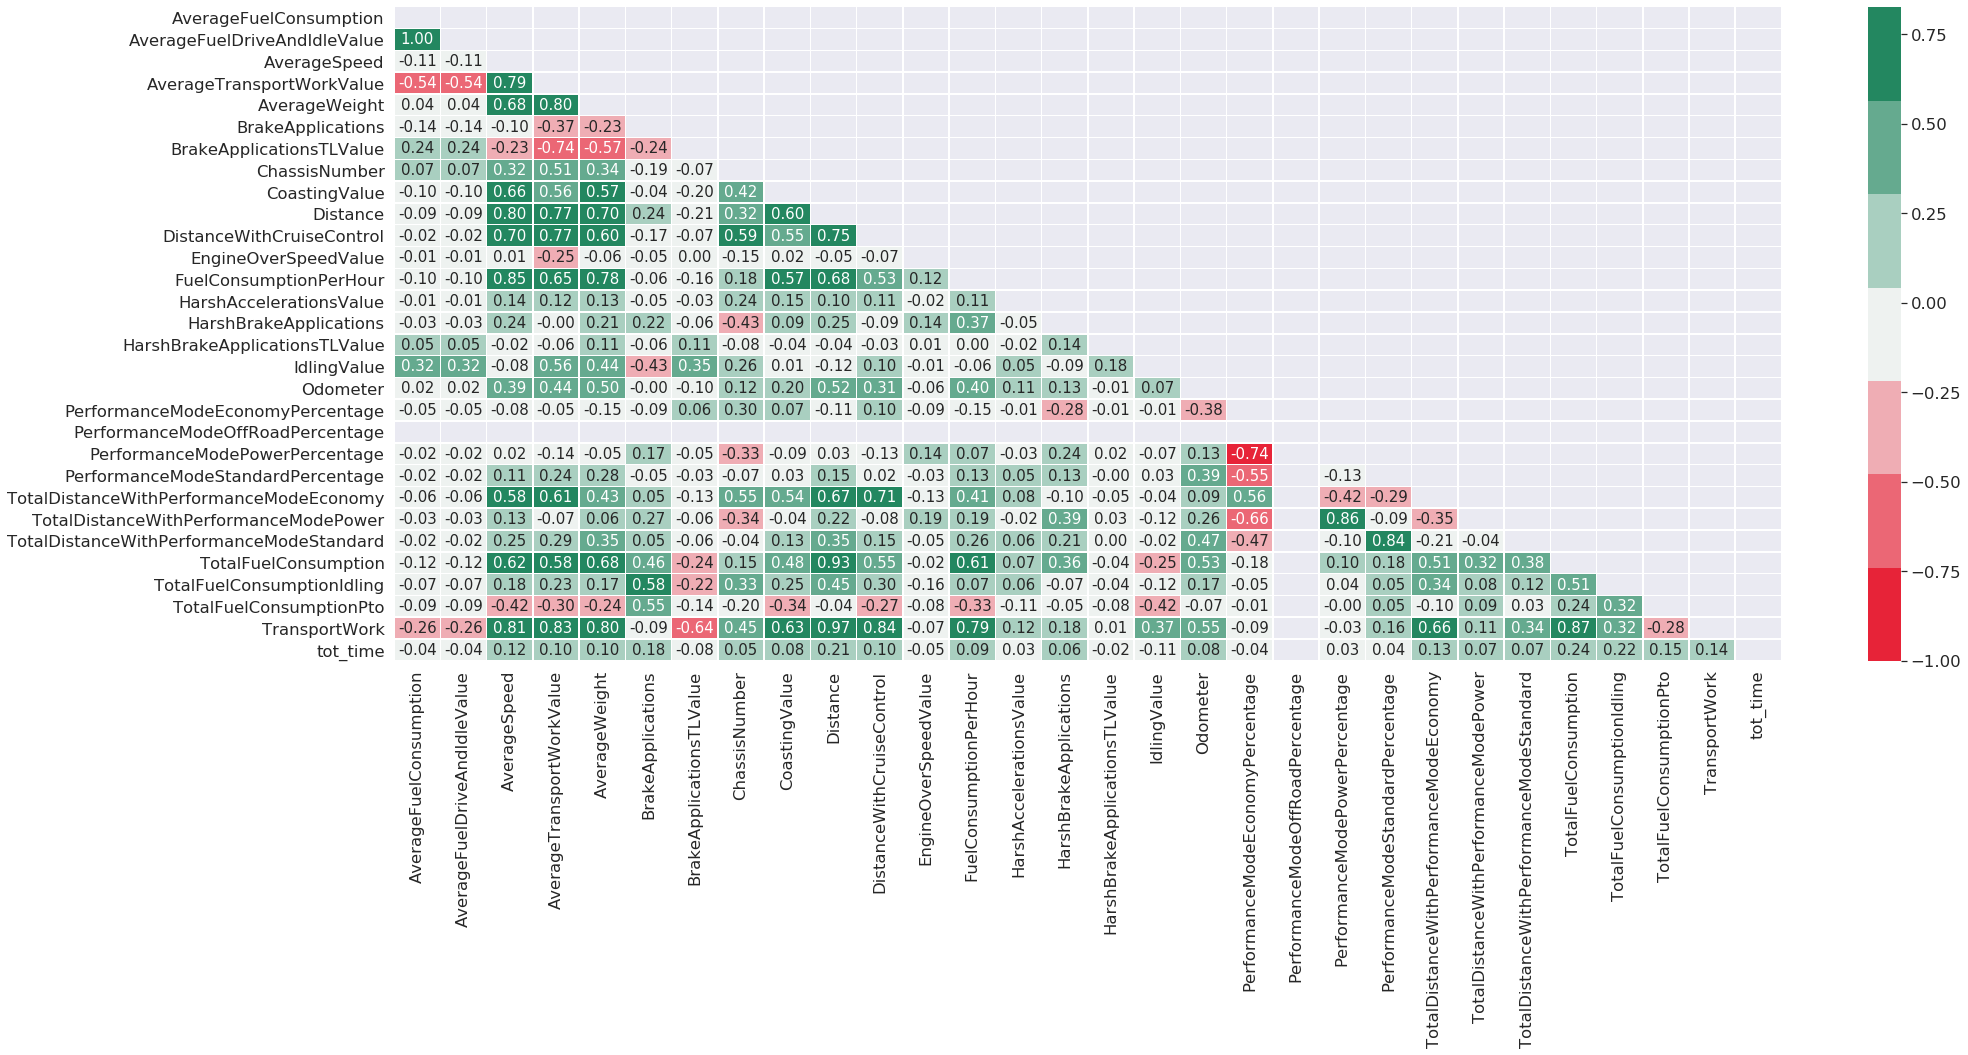

In [16]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(30,15))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlations, annot=True, fmt='.2f', linewidths=0.5,
            mask=mask, ax=ax, cmap=sns.diverging_palette(10, 150, s=90, n=7),
            robust=True, vmin=-1, annot_kws={"size": 15})
plt.tight_layout()
fig.savefig("corr.png")

In [17]:
data.columns

Index(['AverageFuelConsumption', 'AverageFuelDriveAndIdleValue',
       'AverageSpeed', 'AverageTransportWorkValue', 'AverageWeight',
       'BrakeApplications', 'BrakeApplicationsTLValue', 'ChassisNumber',
       'CoastingValue', 'CustomerVehicleName', 'Distance',
       'DistanceWithCruiseControl', 'EngineOverSpeedValue',
       'EngineRunningTime', 'EngineRuntimeIdle', 'EngineRuntimePto',
       'FuelConsumptionPerHour', 'HarshAccelerationsValue',
       'HarshBrakeApplications', 'HarshBrakeApplicationsTLValue',
       'IdlingValue', 'LicensePlate', 'Odometer',
       'PerformanceModeEconomyPercentage', 'PerformanceModeOffRoadPercentage',
       'PerformanceModePowerPercentage', 'PerformanceModeStandardPercentage',
       'StartDate', 'StopDate', 'TotalDistanceWithPerformanceModeEconomy',
       'TotalDistanceWithPerformanceModePower',
       'TotalDistanceWithPerformanceModeStandard', 'TotalFuelConsumption',
       'TotalFuelConsumptionIdling', 'TotalFuelConsumptionPto',
       'Tr

In [36]:
from sklearn.preprocessing import StandardScaler
data_std = data[['AverageFuelConsumption', 'AverageFuelDriveAndIdleValue', 'AverageSpeed', 'AverageTransportWorkValue', 'AverageWeight',
       'BrakeApplications', 'BrakeApplicationsTLValue',
       'CoastingValue', 'Distance',
       'DistanceWithCruiseControl', 'EngineOverSpeedValue',
       'FuelConsumptionPerHour', 'HarshAccelerationsValue',
       'HarshBrakeApplications', 'HarshBrakeApplicationsTLValue',
       'IdlingValue', 'Odometer',
       'PerformanceModeEconomyPercentage', 'PerformanceModeOffRoadPercentage',
       'PerformanceModePowerPercentage', 'PerformanceModeStandardPercentage', 'TotalDistanceWithPerformanceModeEconomy',
       'TotalDistanceWithPerformanceModePower',
       'TotalDistanceWithPerformanceModeStandard', 'TotalFuelConsumption',
       'TotalFuelConsumptionIdling', 'TotalFuelConsumptionPto',
       'TransportWork']].copy()
data_std[data_std.columns] = StandardScaler().fit_transform(data_std[data_std.columns])

In [37]:
from sklearn.decomposition import PCA
#data_std = data_std.fillna(-100)
data_std = data_std.dropna()
pca = PCA(n_components=10)
pca.fit(data_std)
projection = pca.transform(data_std)

In [38]:
pca.explained_variance_ratio_

array([0.36576668, 0.17679359, 0.10599427, 0.08880458, 0.0574045 ,
       0.04735888, 0.03486621, 0.02575389, 0.02155855, 0.02082104])

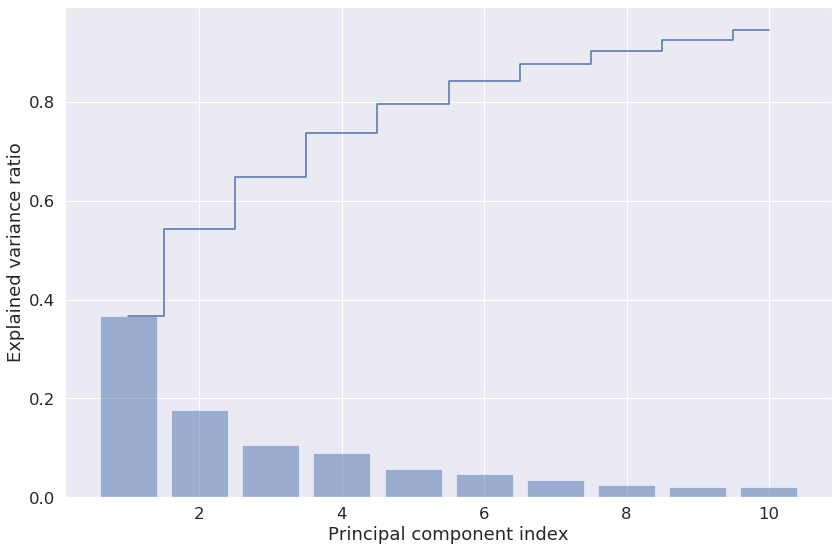

In [41]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 8))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
#plt.legend(loc='best')
plt.tight_layout()
plt.savefig("PCA_10")
plt.show()

In [54]:
most_important = [np.argpartition(np.abs(pca.components_[i]), -3)[-3:] for i in range(10)]

In [55]:
initial_feature_names = data_std.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(10)]

In [56]:
most_important_names

[Index(['AverageTransportWorkValue', 'Distance', 'TransportWork'], dtype='object'),
 Index(['PerformanceModePowerPercentage', 'PerformanceModeEconomyPercentage',
        'TotalDistanceWithPerformanceModePower'],
       dtype='object'),
 Index(['TotalDistanceWithPerformanceModePower',
        'TotalDistanceWithPerformanceModeStandard',
        'PerformanceModeStandardPercentage'],
       dtype='object'),
 Index(['TotalFuelConsumptionIdling', 'TotalFuelConsumptionPto',
        'BrakeApplications'],
       dtype='object'),
 Index(['PerformanceModePowerPercentage', 'HarshAccelerationsValue',
        'HarshBrakeApplications'],
       dtype='object'),
 Index(['BrakeApplications', 'HarshAccelerationsValue',
        'HarshBrakeApplications'],
       dtype='object'),
 Index(['CoastingValue', 'Odometer', 'TotalFuelConsumptionIdling'], dtype='object'),
 Index(['AverageWeight', 'TotalFuelConsumptionPto', 'Odometer'], dtype='object'),
 Index(['EngineOverSpeedValue', 'CoastingValue', 'HarshBrakeAppl